In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [3]:
from xgboost import XGBRegressor  # Use XGBClassifier for classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [4]:
df = pd.read_csv(r"F:\DOWNLOADS\INDIA\Crop yield new dataset.csv")
df

,Region,Soil_Type,Crop,Temperature_Celsius,Rainfall_mm,Water,Weather_Condition,Soil_pH,N(Nitrogen),P(Phosphorus),K(Potassium),Irrigation_Used,Fertilizer_Used,Days_to_Harvest,Crop Yield(Ton/Hector)
0,West,Sandy,Cotton,27.676966,897.077239,90.0,Cloudy,6.75,55.0,44.0,36.0,True,False,122,6.555816
1,South,Clay,Rice,18.026142,992.673282,155.0,Rainy,6.25,78.0,60.0,44.0,True,True,140,8.527341
2,North,Loam,Barley,29.794042,147.998025,35.0,Sunny,6.25,70.0,60.0,50.0,False,False,106,1.127443
3,North,Sandy,Soybean,16.644190,986.866331,57.5,Rainy,6.75,45.0,40.0,33.0,True,False,146,6.517573
4,South,Silt,Wheat,31.620687,730.379174,37.5,Cloudy,6.50,140.0,50.0,95.0,True,True,110,7.248251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299994,East,Loam,Wheat,28.734643,362.534938,40.0,Rainy,6.50,77.0,60.0,45.0,True,False,124,3.571021
299995,North,Clay,Soybean,31.462327,156.297529,45.0,Rainy,6.25,54.0,50.0,44.0,False,True,97,3.351253
299996,North,Sandy,Soybean,24.308284,724.716503,57.5,Sunny,6.75,45.0,40.0,33.0,False,True,133,5.621784
299997,South,Clay,Rice,38.607461,389.026474,NaN,Sunny,6.25,78.0,60.0,44.0,True,False,146,3.943068


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299999 entries, 0 to 299998
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  299999 non-null  object 
 1   Soil_Type               299999 non-null  object 
 2   Crop                    299999 non-null  object 
 3   Temperature_Celsius     299999 non-null  float64
 4   Rainfall_mm             299999 non-null  float64
 5   Water                   299998 non-null  float64
 6   Weather_Condition       299999 non-null  object 
 7   Soil_pH                 299998 non-null  float64
 8   N(Nitrogen)             299999 non-null  float64
 9   P(Phosphorus)           299998 non-null  float64
 10  K(Potassium)            299999 non-null  float64
 11  Irrigation_Used         299999 non-null  bool   
 12  Fertilizer_Used         299999 non-null  bool   
 13  Days_to_Harvest         299999 non-null  int64  
 14  Crop Yield(Ton/Hecto

In [6]:
df.corr

<bound method DataFrame.corr of        Region Soil_Type     Crop  Temperature_Celsius  Rainfall_mm  Water   \
0        West     Sandy   Cotton            27.676966   897.077239    90.0   
1       South      Clay     Rice            18.026142   992.673282   155.0   
2       North      Loam   Barley            29.794042   147.998025    35.0   
3       North     Sandy  Soybean            16.644190   986.866331    57.5   
4       South      Silt    Wheat            31.620687   730.379174    37.5   
...       ...       ...      ...                  ...          ...     ...   
299994   East      Loam    Wheat            28.734643   362.534938    40.0   
299995  North      Clay  Soybean            31.462327   156.297529    45.0   
299996  North     Sandy  Soybean            24.308284   724.716503    57.5   
299997  South      Clay     Rice            38.607461   389.026474     NaN   
299998  North      Loam    Wheat            21.165766   435.387328    40.0   

       Weather_Condition  Soil_

In [7]:
df.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Temperature_Celsius       float64
Rainfall_mm               float64
Water                     float64
Weather_Condition          object
Soil_pH                   float64
N(Nitrogen)               float64
P(Phosphorus)             float64
K(Potassium)              float64
Irrigation_Used              bool
Fertilizer_Used              bool
Days_to_Harvest             int64
Crop Yield(Ton/Hector)    float64
dtype: object

In [8]:
df.describe(include='all')

,Region,Soil_Type,Crop,Temperature_Celsius,Rainfall_mm,Water,Weather_Condition,Soil_pH,N(Nitrogen),P(Phosphorus),K(Potassium),Irrigation_Used,Fertilizer_Used,Days_to_Harvest,Crop Yield(Ton/Hector)
count,299999,299999,299999,299999.000000,299999.000000,299998.000000,299999,299998.000000,299999.000000,299998.000000,299999.000000,299999,299999,299999.000000,299999.000000
unique,4,6,6,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,2,2,NaN,NaN
top,East,Clay,Cotton,NaN,NaN,NaN,Sunny,NaN,NaN,NaN,NaN,False,False,NaN,NaN
freq,75330,50121,50123,NaN,NaN,NaN,100296,NaN,NaN,NaN,NaN,150020,150184,NaN,NaN
mean,NaN,NaN,NaN,27.521169,549.707798,67.836669,NaN,6.350707,77.913915,54.531004,66.230119,NaN,NaN,104.454425,4.647911
std,NaN,NaN,NaN,7.213242,259.756749,33.938448,NaN,0.451905,33.352020,9.501628,40.400397,NaN,NaN,25.943356,1.696128
min,NaN,NaN,NaN,15.000041,100.006194,30.000000,NaN,5.500000,25.000000,40.000000,27.000000,NaN,NaN,60.000000,-0.841617
25%,NaN,NaN,NaN,21.273268,324.528766,40.000000,NaN,6.250000,55.000000,49.500000,36.000000,NaN,NaN,82.000000,3.417055
50%,NaN,NaN,NaN,27.555620,550.381990,65.000000,NaN,6.500000,66.000000,50.000000,45.000000,NaN,NaN,104.000000,4.648246
75%,NaN,NaN,NaN,33.770770,773.855506,77.500000,NaN,6.750000,84.000000,60.000000,95.000000,NaN,NaN,127.000000,5.874523


In [9]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Temperature_Celsius', 'Rainfall_mm',
       'Water ', 'Weather_Condition', 'Soil_pH', 'N(Nitrogen)',
       'P(Phosphorus)', 'K(Potassium)', 'Irrigation_Used', 'Fertilizer_Used',
       'Days_to_Harvest', 'Crop Yield(Ton/Hector)'],
      dtype='object')

In [10]:
df.shape

(299999, 15)

In [11]:
df.size

4499985

In [12]:
df.dropna(inplace=True)

In [13]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
299993    False
299994    False
299995    False
299996    False
299998    False
Length: 299996, dtype: bool

In [14]:
df['Soil_Type'].value_counts()

Soil_Type
Clay      50119
Peaty     50072
Loam      50057
Sandy     49954
Chalky    49938
Silt      49856
Name: count, dtype: int64

In [15]:
df['N(Nitrogen)'].fillna(77)

0          55.0
1          78.0
2          70.0
3          45.0
4         140.0
          ...  
299993    140.0
299994     77.0
299995     54.0
299996     45.0
299998     77.0
Name: N(Nitrogen), Length: 299996, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299996 entries, 0 to 299998
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  299996 non-null  object 
 1   Soil_Type               299996 non-null  object 
 2   Crop                    299996 non-null  object 
 3   Temperature_Celsius     299996 non-null  float64
 4   Rainfall_mm             299996 non-null  float64
 5   Water                   299996 non-null  float64
 6   Weather_Condition       299996 non-null  object 
 7   Soil_pH                 299996 non-null  float64
 8   N(Nitrogen)             299996 non-null  float64
 9   P(Phosphorus)           299996 non-null  float64
 10  K(Potassium)            299996 non-null  float64
 11  Irrigation_Used         299996 non-null  bool   
 12  Fertilizer_Used         299996 non-null  bool   
 13  Days_to_Harvest         299996 non-null  int64  
 14  Crop Yield(Ton/Hector)  2

In [17]:
df.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Temperature_Celsius       0
Rainfall_mm               0
Water                     0
Weather_Condition         0
Soil_pH                   0
N(Nitrogen)               0
P(Phosphorus)             0
K(Potassium)              0
Irrigation_Used           0
Fertilizer_Used           0
Days_to_Harvest           0
Crop Yield(Ton/Hector)    0
dtype: int64

In [18]:
df.replace({'Region':{'North':0,'South':1,'East':2,'West':3}},inplace=True)
df.replace({'Soil_Type':{'Sandy':0,'Clay':1,'Loam':2,'Silt':3,'Peaty':4,'Chalky':5}},inplace=True)
df.replace({'Crop':{'Cotton':0,'Rice':1,'Barley':2,'Soybean':3,'Wheat':4,'Maize':5}},inplace=True)
df.replace({'Weather_Condition':{'Cloudy':0,'Rainy':1,'Sunny':2}},inplace=True)

C:\Users\dines\AppData\Local\Temp\ipykernel_22568\3694946388.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Region':{'North':0,'South':1,'East':2,'West':3}},inplace=True)
C:\Users\dines\AppData\Local\Temp\ipykernel_22568\3694946388.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Soil_Type':{'Sandy':0,'Clay':1,'Loam':2,'Silt':3,'Peaty':4,'Chalky':5}},inplace=True)
C:\Users\dines\AppData\Local\Temp\ipykernel_22568\3694946388.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and w

In [19]:
encoder = LabelEncoder()
df['Irrigation_Used']=encoder.fit_transform(df['Irrigation_Used'])
df['Irrigation_Used']

df['Fertilizer_Used']=encoder.fit_transform(df['Fertilizer_Used'])
df['Fertilizer_Used']

0         0
1         1
2         0
3         0
4         1
         ..
299993    1
299994    0
299995    1
299996    1
299998    0
Name: Fertilizer_Used, Length: 299996, dtype: int64

In [20]:
df

,Region,Soil_Type,Crop,Temperature_Celsius,Rainfall_mm,Water,Weather_Condition,Soil_pH,N(Nitrogen),P(Phosphorus),K(Potassium),Irrigation_Used,Fertilizer_Used,Days_to_Harvest,Crop Yield(Ton/Hector)
0,3,0,0,27.676966,897.077239,90.0,0,6.75,55.0,44.0,36.0,1,0,122,6.555816
1,1,1,1,18.026142,992.673282,155.0,1,6.25,78.0,60.0,44.0,1,1,140,8.527341
2,0,2,2,29.794042,147.998025,35.0,2,6.25,70.0,60.0,50.0,0,0,106,1.127443
3,0,0,3,16.644190,986.866331,57.5,1,6.75,45.0,40.0,33.0,1,0,146,6.517573
4,1,3,4,31.620687,730.379174,37.5,0,6.50,140.0,50.0,95.0,1,1,110,7.248251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299993,0,3,4,24.972778,703.441823,37.5,2,6.50,140.0,50.0,95.0,0,1,123,5.494351
299994,2,2,4,28.734643,362.534938,40.0,1,6.50,77.0,60.0,45.0,1,0,124,3.571021
299995,0,1,3,31.462327,156.297529,45.0,1,6.25,54.0,50.0,44.0,0,1,97,3.351253
299996,0,0,3,24.308284,724.716503,57.5,2,6.75,45.0,40.0,33.0,0,1,133,5.621784


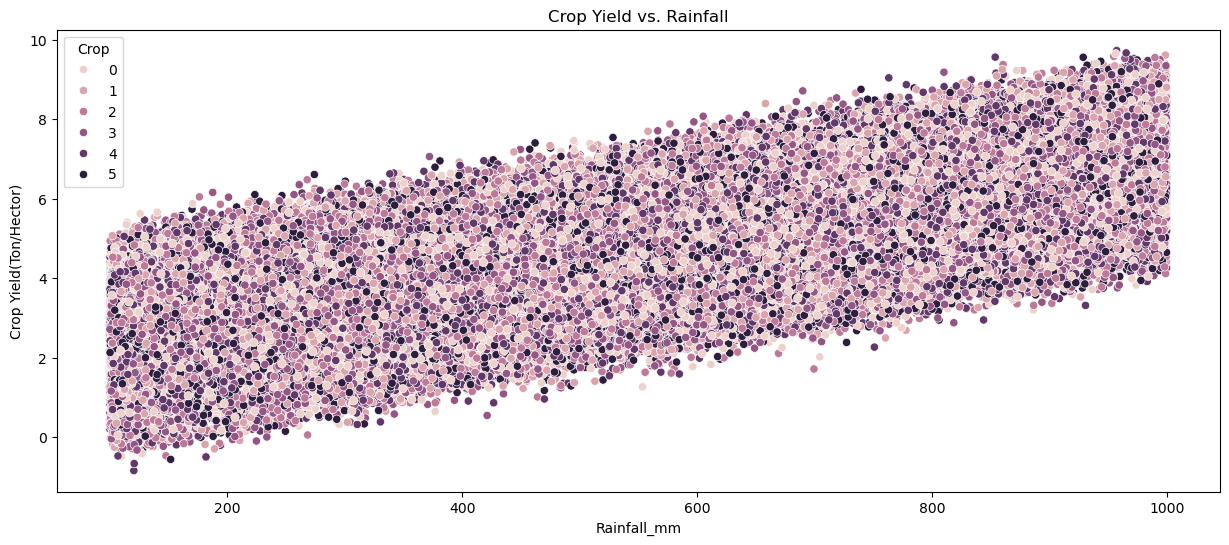

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Rainfall_mm', y='Crop Yield(Ton/Hector)', data=df, hue='Crop')
plt.title('Crop Yield vs. Rainfall')
plt.show()

C:\Users\dines\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


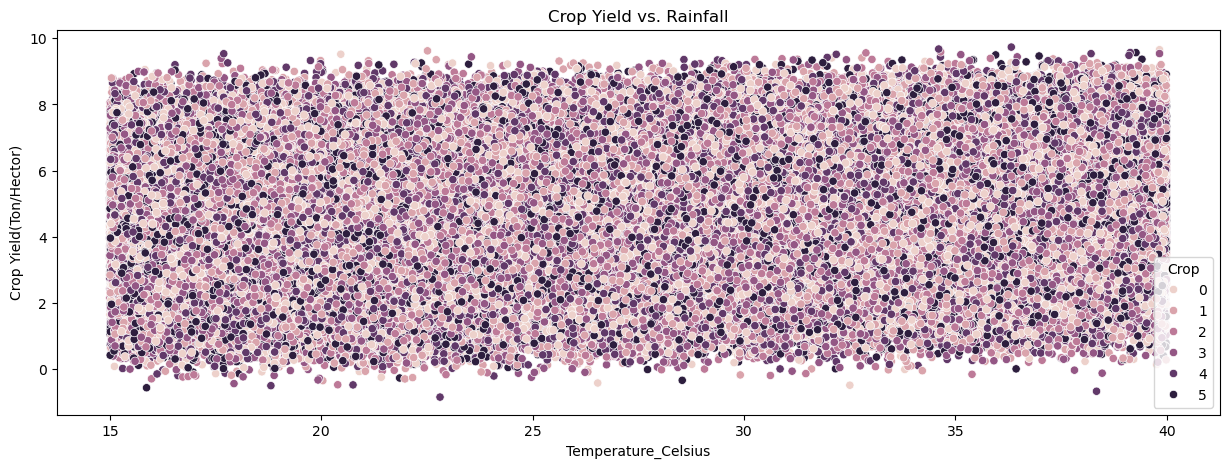

In [22]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Temperature_Celsius', y='Crop Yield(Ton/Hector)', data=df, hue='Crop')
plt.title('Crop Yield vs. Rainfall')
plt.show()

In [23]:
#plt.figure(figsize=(15,8))
#sns.pairplot(df[['Crop Yield(Ton/Hector)', 'Rainfall_mm','Water_require(Llit in lacs/hec)','Temperature_Celsius','Soil_pH','N(Nitrogen)','P(Phosphorus)','K(Potassium)']])
#plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299996 entries, 0 to 299998
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  299996 non-null  int64  
 1   Soil_Type               299996 non-null  int64  
 2   Crop                    299996 non-null  int64  
 3   Temperature_Celsius     299996 non-null  float64
 4   Rainfall_mm             299996 non-null  float64
 5   Water                   299996 non-null  float64
 6   Weather_Condition       299996 non-null  int64  
 7   Soil_pH                 299996 non-null  float64
 8   N(Nitrogen)             299996 non-null  float64
 9   P(Phosphorus)           299996 non-null  float64
 10  K(Potassium)            299996 non-null  float64
 11  Irrigation_Used         299996 non-null  int64  
 12  Fertilizer_Used         299996 non-null  int64  
 13  Days_to_Harvest         299996 non-null  int64  
 14  Crop Yield(Ton/Hector)  2

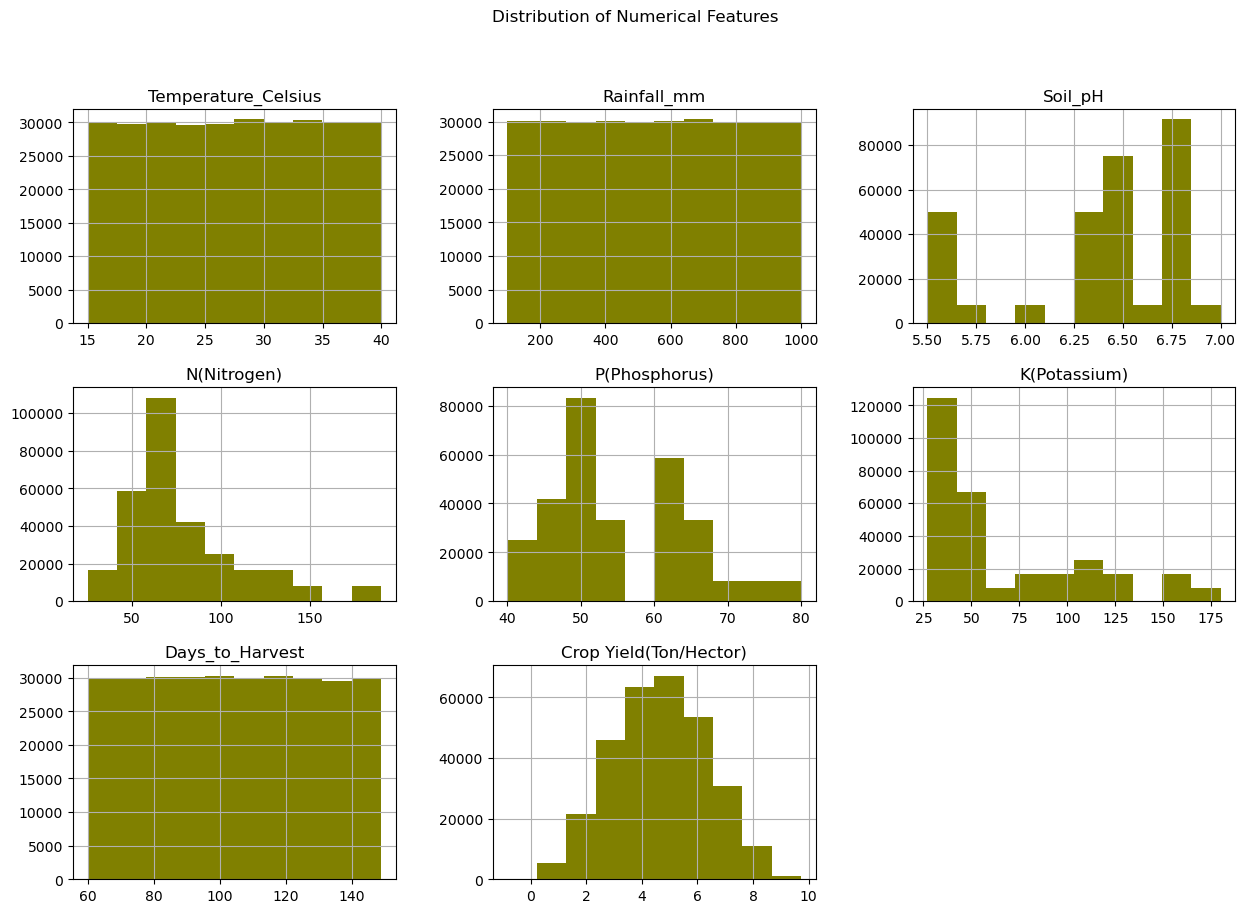

In [25]:
numerical_features = ['Temperature_Celsius', 'Rainfall_mm','Soil_pH', 'N(Nitrogen)', 'P(Phosphorus)', 'K(Potassium)', 'Days_to_Harvest', 'Crop Yield(Ton/Hector)']
df[numerical_features].hist(figsize=(15, 10),color='olive')
plt.suptitle('Distribution of Numerical Features')
plt.show()

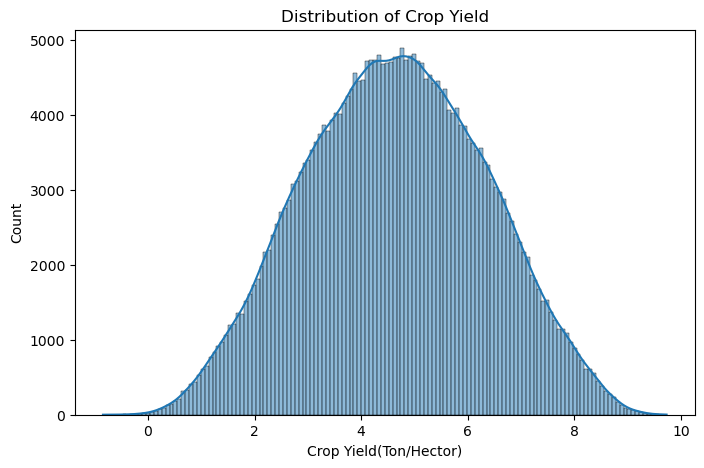

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Crop Yield(Ton/Hector)'], kde=True)
plt.title('Distribution of Crop Yield')
plt.show()

In [27]:
x = df.drop(['Crop Yield(Ton/Hector)'],axis=1)
y = df['Crop Yield(Ton/Hector)']

In [28]:
x.head(1)

,Region,Soil_Type,Crop,Temperature_Celsius,Rainfall_mm,Water,Weather_Condition,Soil_pH,N(Nitrogen),P(Phosphorus),K(Potassium),Irrigation_Used,Fertilizer_Used,Days_to_Harvest
0,3,0,0,27.676966,897.077239,90.0,0,6.75,55.0,44.0,36.0,1,0,122


In [29]:
y.head(1)

0    6.555816
Name: Crop Yield(Ton/Hector), dtype: float64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [31]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [32]:
trainning_data_prediction = model.predict(x_train)

In [33]:
error_score = metrics.r2_score(y_train,trainning_data_prediction)
print('r Squred error :',error_score)

r Squred error : 0.9144320235785734


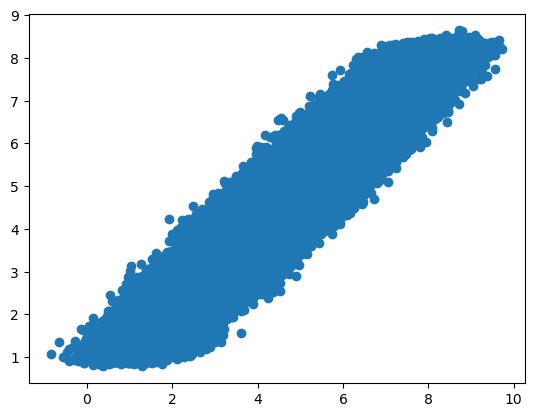

In [34]:
plt.scatter(y_train,trainning_data_prediction)

In [35]:
test_data_prediction = model.predict(x_test)

In [36]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squred error:',error_score)

R squred error: 0.9121523231671365


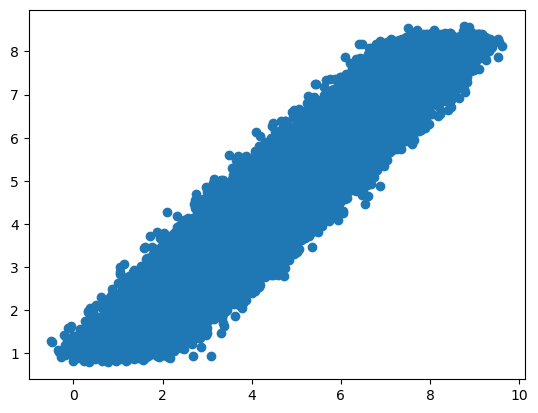

In [37]:
plt.scatter(y_test,test_data_prediction)

In [38]:
print(model.predict([[3,0,0,27.676966,897.077239,90.0,0,6.75,55.0,44.0,36.0,1,0,122]]))

[6.2561183]


In [39]:
import pickle

In [40]:
with open('xg.pkl','wb') as f:
    pickle.dump(test_data_prediction,f)

In [41]:
with open('xg.pkl','rb') as f:
    load_file = pickle.load(f)
    print(load_file)

[3.453613  2.4667487 2.898533  ... 7.575316  1.6758655 6.4503417]
